In [85]:
#library import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import LabelEncoder

In [27]:
from sklearn.datasets import fetch_openml

penguins = fetch_openml(name='penguins', version=1, as_frame=True)

In [28]:
print(penguins.DESCR)

![palmerpenguins](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/logo.png)

## Description

The goal of palmerpenguins is to provide a great dataset for data exploration & visualization, as an alternative to iris.

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Please see [https://github.com/allisonhorst/palmerpenguins](https://github.com/allisonhorst/palmerpenguins) for more information.

## Citation
Anyone interested in publishing the data should contact [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) about analysis and working together on any final products. From Gorman et al. (2014): _"Individuals interested in using these data are expected to follow the US LTER Network’s Data Access Policy, Requirements and Use Agreement: https://lternet.edu/data-access-policy/."_

This dataset has been derived from the R pack

##Data Preparation

###Data Collection
This step involves obtaining the data from various sources, which could include databases, files, APIs, etc.

In [29]:
#Perubahan menjadi Data Frame untuk memudahkan EDA
penguins_df = penguins.frame

In [30]:
penguins_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [31]:
penguins_df.shape

(344, 7)

In [32]:
print(penguins_df.dtypes)

species              category
island               category
culmen_length_mm      float64
culmen_depth_mm       float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
dtype: object


In [33]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


###Data Preprocessing

This step involves cleaning, transforming, and preparing the data for analysis. It includes steps like normalization, feature selection, and transformation.

####Data Cleaning

In [34]:
# We use .null to find the missing values
print(penguins_df.isnull().sum())


species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [35]:
# Dropping null values.
df_clean =penguins_df.dropna()

# Let's check for null values again
print(df_clean.isnull().sum())


species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


####Feature Selection and encoding

In [36]:
df_clean = df_clean.drop(columns=['island', 'sex'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            334 non-null    category
 1   culmen_length_mm   334 non-null    float64 
 2   culmen_depth_mm    334 non-null    float64 
 3   flipper_length_mm  334 non-null    float64 
 4   body_mass_g        334 non-null    float64 
dtypes: category(1), float64(4)
memory usage: 13.5 KB


##Exploratory Data Analysis

###Flipper Length vs Body Mass Correlation
From the scatter plot below, we can observe *that* we have a linear relationship between the flipper length and the body mass.

The longer the flipper of a penguin, the heavier the penguin.

The Gentoo species is the most heaviest of the three species.

Text(0.5, 1.0, 'Flipper Length vs Body Mass')

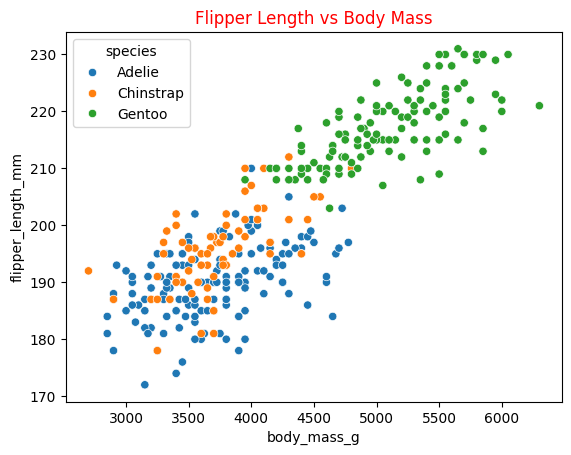

In [50]:
# Flipper length vs body mass plot

sns.scatterplot(x = "body_mass_g", y = "flipper_length_mm", data = df_clean, hue = ("species"))

# Title.
plt.title('Flipper Length vs Body Mass', color = "red")

###Culmen Length vs Culmen Depth

Text(0.5, 1.0, 'Culmen Length vs Culmen Depth')

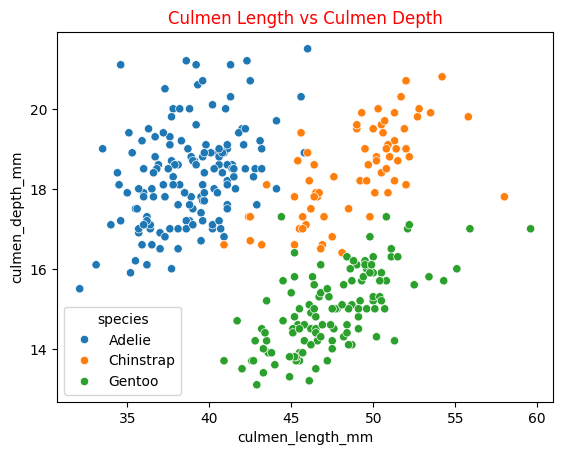

In [51]:
#Bill Length vs Bill Depth Plot

sns.scatterplot(x = "culmen_length_mm", y = "culmen_depth_mm", data = df_clean, hue = ("species"))

# Title.
plt.title('Culmen Length vs Culmen Depth', color = "red")

###Correlation Matrix

In [52]:
#Correlation Heatmap
num_cols = ['culmen_length_mm', 'culmen_depth_mm',
            'flipper_length_mm', 'body_mass_g']

corr = df_clean[num_cols].corr()



In [53]:
#To make it easy to read the relationship we round the values to two digits
corr.round (2)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.00,-0.23,0.65,0.59
culmen_depth_mm,-0.23,1.00,-0.58,-0.47
flipper_length_mm,0.65,-0.58,1.00,0.87
body_mass_g,0.59,-0.47,0.87,1.00


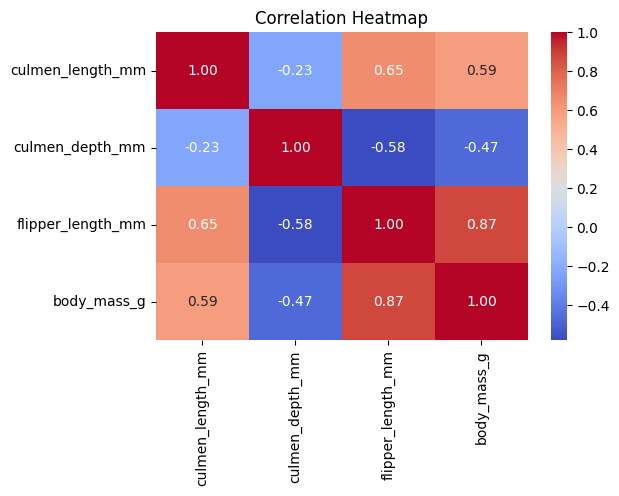

In [54]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

A negative coefficient tells us that the relationship between the variables is negative, meaning that when one value increases, the other decreases.

Similarly, a positive coefficient indicates that when one value increases, so does the other.

1. Bill Length vs. Bill Depth: Weak negative correlation (r = -0.23)

- This implies that as bill length increases, there is a slight tendency for bill depth to decrease, although the correlation isn’t particularly strong.

2. Bill Length vs. Flipper Length: A robust positive correlation (r = 0.6562).

- This indicates that as bill length increases, there is a significant tendency for flipper length to also increase.

3. Bill Depth vs. Flipper Length: A Moderate negative correlation (r = -0.5839).

- This suggests that as bill depth increases, there is a moderate tendency for flipper length to decrease.

## Data Visualization
- Bar Plot, for the number of penguins per species.
- Histogram
- Scatter Plot

(array([0, 1, 2]),
 [Text(0, 0, 'Adelie'), Text(1, 0, 'Gentoo'), Text(2, 0, 'Chinstrap')])

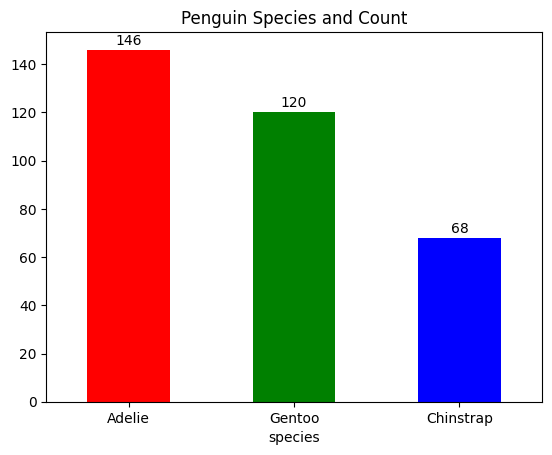

In [55]:
#Bar plot for the number of penguins per species.
color = ['red', 'green', 'blue']
df_clean['species'].value_counts().plot(kind='bar', color=color)
plt.title('Penguin Species and Count')

#Add labels
counts = df_clean['species'].value_counts()
for i, count in enumerate(counts):
   plt.text(i, count +1, str(count), ha= 'center', va = 'bottom')
plt.xticks(rotation=0)

/tmp/ipython-input-3288683566.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')


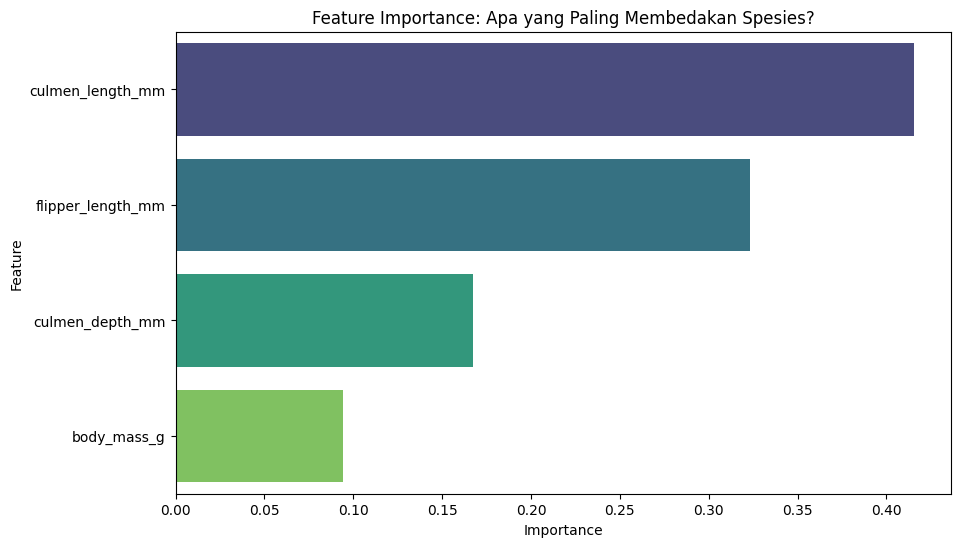

In [103]:
importances = model.feature_importances_
feature_names = num_cols

fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')
plt.title('Feature Importance: Apa yang Paling Membedakan Spesies?')
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

In [87]:
# Flipper length histogram
sns.histplot(x = "flipper_length_mm", data = df_clean, hue="species", multiple="stack", ax=axes[0])
axes[0].set_title("Flipper Length")

Text(0.5, 1.0, 'Flipper Length')

In [88]:
# Culmen depth histogram
sns.histplot(x = "culmen_depth_mm", data = df_clean, hue="species", multiple="stack", ax=axes[1])
axes[1].set_title("Culmen Depth")

Text(0.5, 1.0, 'Culmen Depth')

In [89]:
sns.histplot(x = "culmen_length_mm", data = df_clean, hue="species", multiple="stack", ax=axes[2])
axes[2].set_title("Culmen Length")

Text(0.5, 1.0, 'Culmen Length')

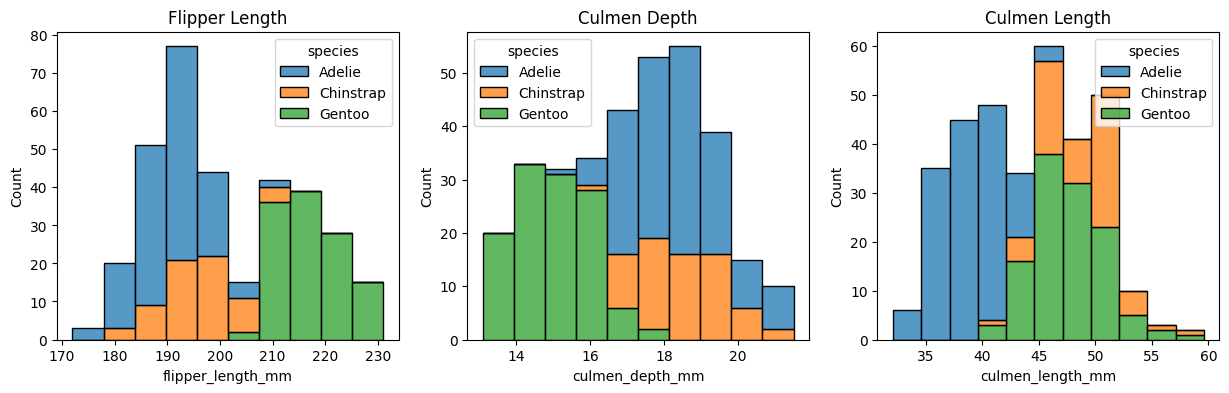

<Figure size 640x480 with 0 Axes>

In [92]:
plt.tight_layout()
fig

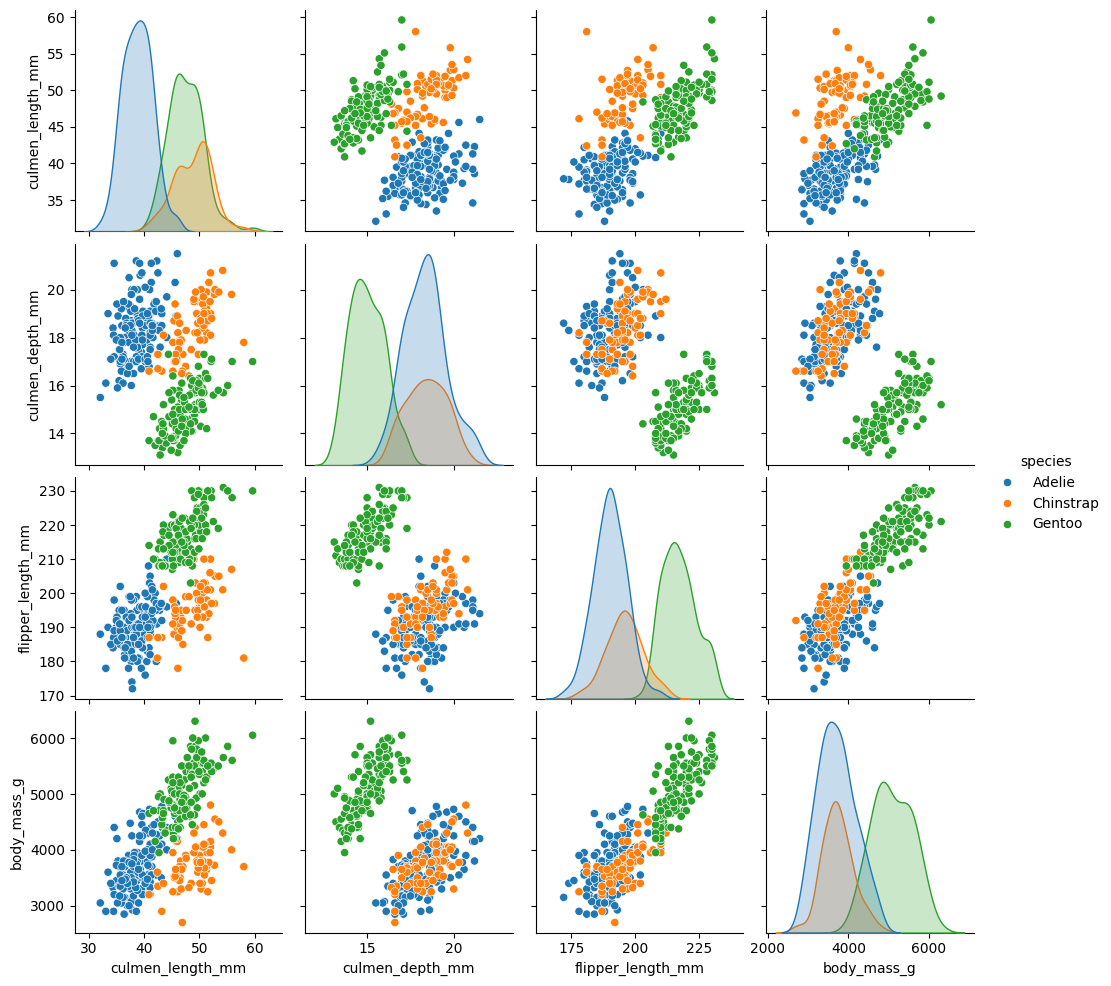

In [93]:
#Scatter Matrix
sns.pairplot(df_clean,
             vars=['culmen_length_mm', 'culmen_depth_mm',
                   'flipper_length_mm', 'body_mass_g'],
             hue='species',
             diag_kind='kde')
plt.show()

##Machine Learning

In [94]:
X = df_clean.drop(columns=['species'])
y = df_clean['species']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [97]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [98]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

print("Training model selesai.")

Training model selesai.


In [99]:
y_pred = model.predict(X_test_scaled)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9702970297029703

Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      0.95      0.98        44
   Chinstrap       0.88      1.00      0.93        21
      Gentoo       1.00      0.97      0.99        36

    accuracy                           0.97       101
   macro avg       0.96      0.98      0.97       101
weighted avg       0.97      0.97      0.97       101



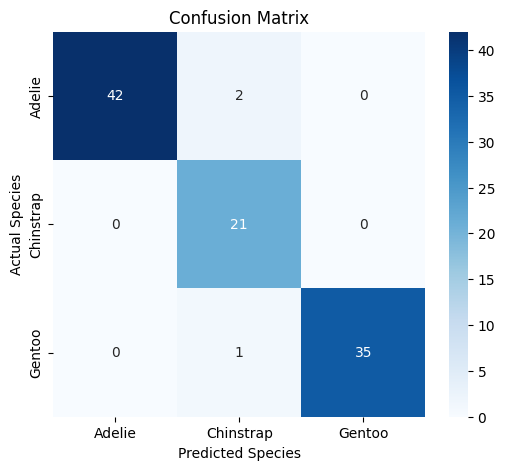

In [100]:
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Species')
plt.xlabel('Predicted Species')
plt.show()

/tmp/ipython-input-3288683566.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')


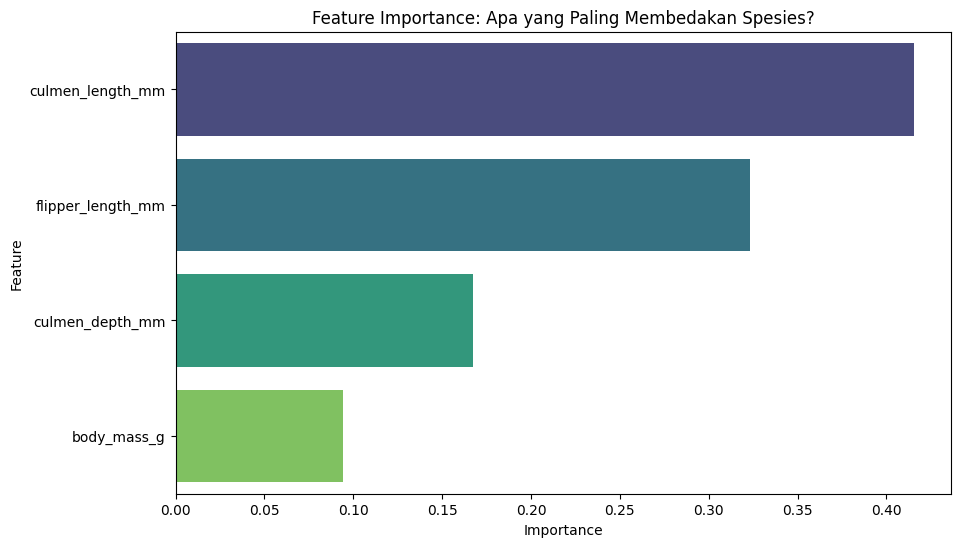